<a href="https://colab.research.google.com/github/kaybrian/Tensorflow_self_study/blob/main/handDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_test =  X_test / 255.0

In [ ]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)


In [ ]:
X_train_flatten.shape
X_test_flatten.shape

(10000, 784)

In [ ]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create a simple Neural Network with the data provided


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4680 - accuracy: 0.8772
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2828 - accuracy: 0.9211
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9256
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9266
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9291
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9297


In [ ]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9263


[0.26570308208465576, 0.9262999892234802]

In [ ]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([9.0260273e-03, 3.3315878e-08, 3.5743296e-02, 9.6715552e-01,
       1.4334338e-03, 1.6814235e-01, 1.5378932e-07, 9.9991006e-01,
       1.0755771e-01, 6.2655991e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

Creating a confusion matrix in our data


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    4,    4,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    4,    2,   13,    0],
       [   5,    8,  938,   16,    6,    3,   12,   10,   30,    4],
       [   2,    0,   19,  927,    0,   19,    2,   14,   20,    7],
       [   1,    1,    9,    1,  905,    0,    8,    7,   10,   40],
       [   8,    2,    3,   39,   10,  777,   12,    9,   28,    4],
       [  13,    3,    9,    1,    7,   12,  909,    2,    2,    0],
       [   1,    5,   24,    2,    3,    1,    0,  969,    2,   21],
       [   7,    6,    7,   19,    9,   36,    8,   13,  863,    6],
       [  11,    7,    1,   10,   22,    7,    0,   41,    6,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True Value')

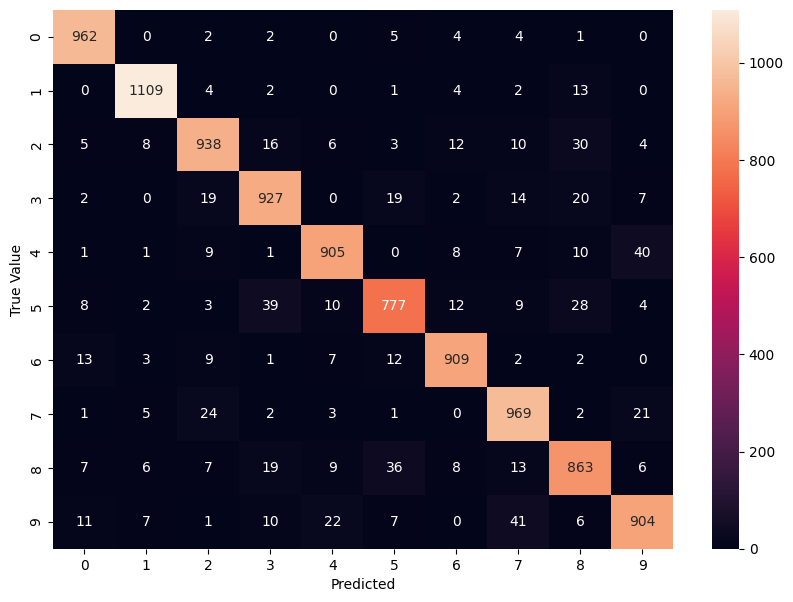

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True Value")

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2714 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1210 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0837 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0636 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9842


In [50]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9761


[0.07939282804727554, 0.9761000275611877]

In [54]:
# using the keras flaten model here
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2695 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1214 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9845
